In [608]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sma
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,log_loss

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier,XGBRegressor
import pydotplus
from IPython.display import Image 
from scipy import stats
from scipy.stats import stats
from scipy.stats import chi2_contingency
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium

### Step 1: Understand the business problem.

In [609]:
data=pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Step 2: Read the data, and convert the data types. 

In [610]:
data.shape

(51717, 17)

In [611]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [612]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [613]:
data.drop(['url','address','phone','reviews_list','menu_item'],axis=1,inplace=True)
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [614]:
data=data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                         'listed_in(city)':'city'})

In [615]:
data['online_order']=data['online_order'].apply(lambda x: '1' if str(x)=='Yes' else '0')
data['book_table']=data['book_table'].apply(lambda x: '1' if str(x)=='Yes' else '0')
data['rate']=data['rate'].apply(lambda x: str(x).split('/')[0])
# data['rate']=data['rate'].str.split('/').str[0]
data['cost']=data['cost'].apply(lambda x: str(x).replace(',',''))
data.dropna(subset=['rate','cost'])
data=data[data['rate']!='nan']
data=data[data['rate']!='NEW']
data=data[data['rate']!='-']
data=data[data['cost']!='nan']
data['rate']=data['rate'].astype(float)
data['votes']=data['votes'].astype(int)
data['cost']=data['cost'].astype(int)

### Step 3: Perform the described method for the data, Try to find any essential points from the described analysis. And check the missing values and Duplicate records. Impute the missing values in the best way possible.

In [616]:
data.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type         147
dish_liked      18091
cuisines            8
cost                0
type                0
city                0
dtype: int64

In [617]:
data.duplicated().sum()

73

In [618]:
data.drop_duplicates(inplace=True)

In [619]:
data.duplicated().sum()

0

In [620]:
data.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type         147
dish_liked      18059
cuisines            8
cost                0
type                0
city                0
dtype: int64

<AxesSubplot:>

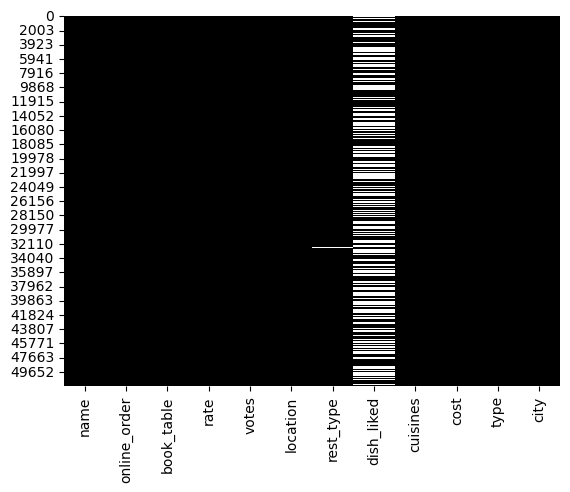

In [621]:
sns.heatmap(data.isnull(),cbar=False,cmap='binary_r')

<AxesSubplot:>

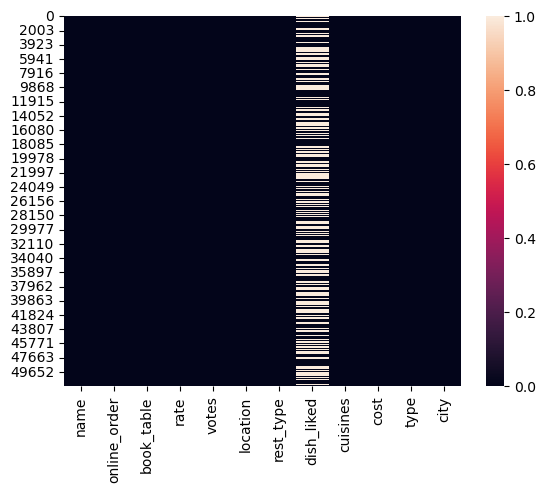

In [622]:
data['rest_type'].value_counts()
data['rest_type']=data['rest_type'].replace(np.nan,'Quick Bites')
sns.heatmap(data.isnull())

In [623]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41345 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41345 non-null  object 
 1   online_order  41345 non-null  object 
 2   book_table    41345 non-null  object 
 3   rate          41345 non-null  float64
 4   votes         41345 non-null  int32  
 5   location      41345 non-null  object 
 6   rest_type     41345 non-null  object 
 7   dish_liked    23286 non-null  object 
 8   cuisines      41337 non-null  object 
 9   cost          41345 non-null  int32  
 10  type          41345 non-null  object 
 11  city          41345 non-null  object 
dtypes: float64(1), int32(2), object(9)
memory usage: 3.8+ MB


In [624]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


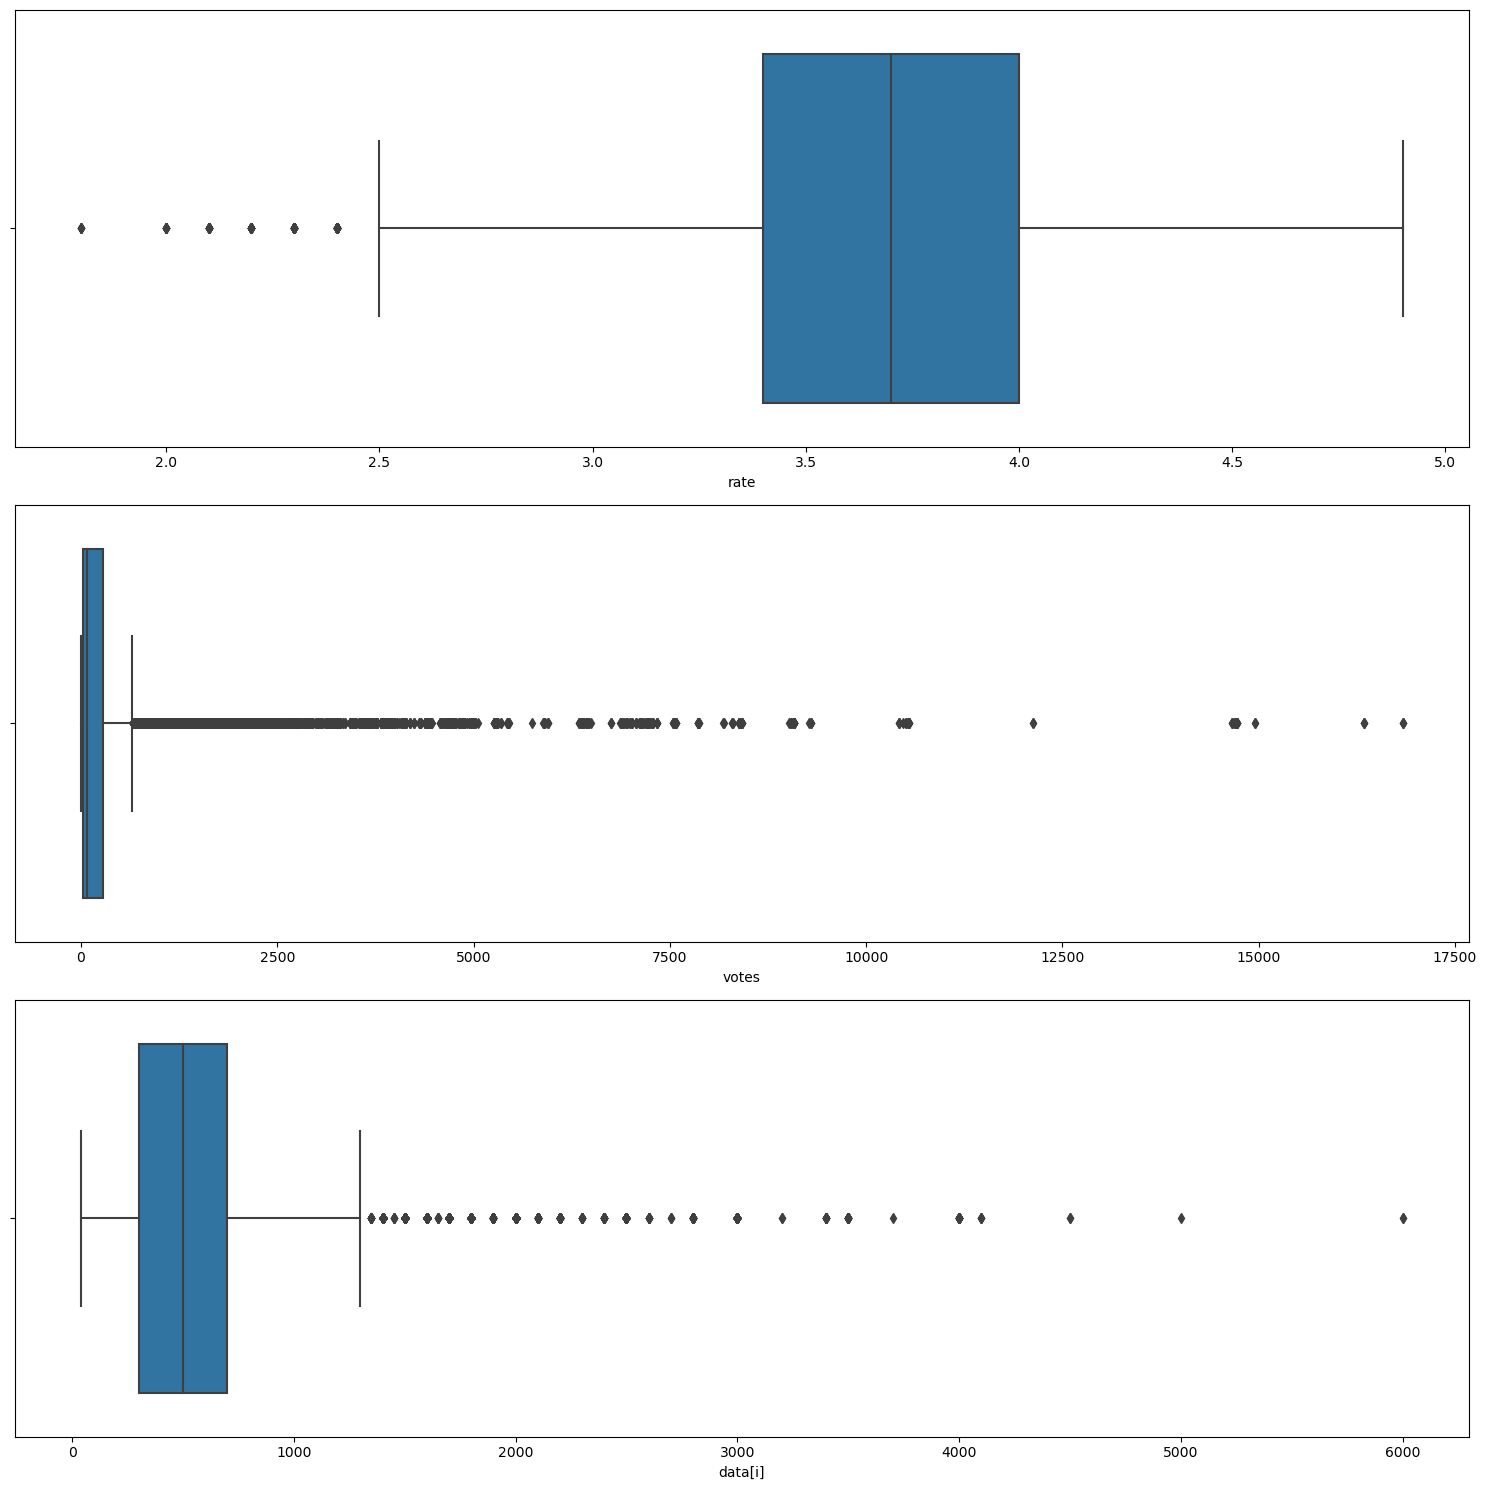

In [625]:
fig,ax=plt.subplots(3,figsize=(15,15))
for i,a in zip(data.select_dtypes(exclude=object),ax.flatten()):
      sns.boxplot(data[i],ax=a)
      plt.xlabel('data[i]')
                    
plt.tight_layout()
plt.show()

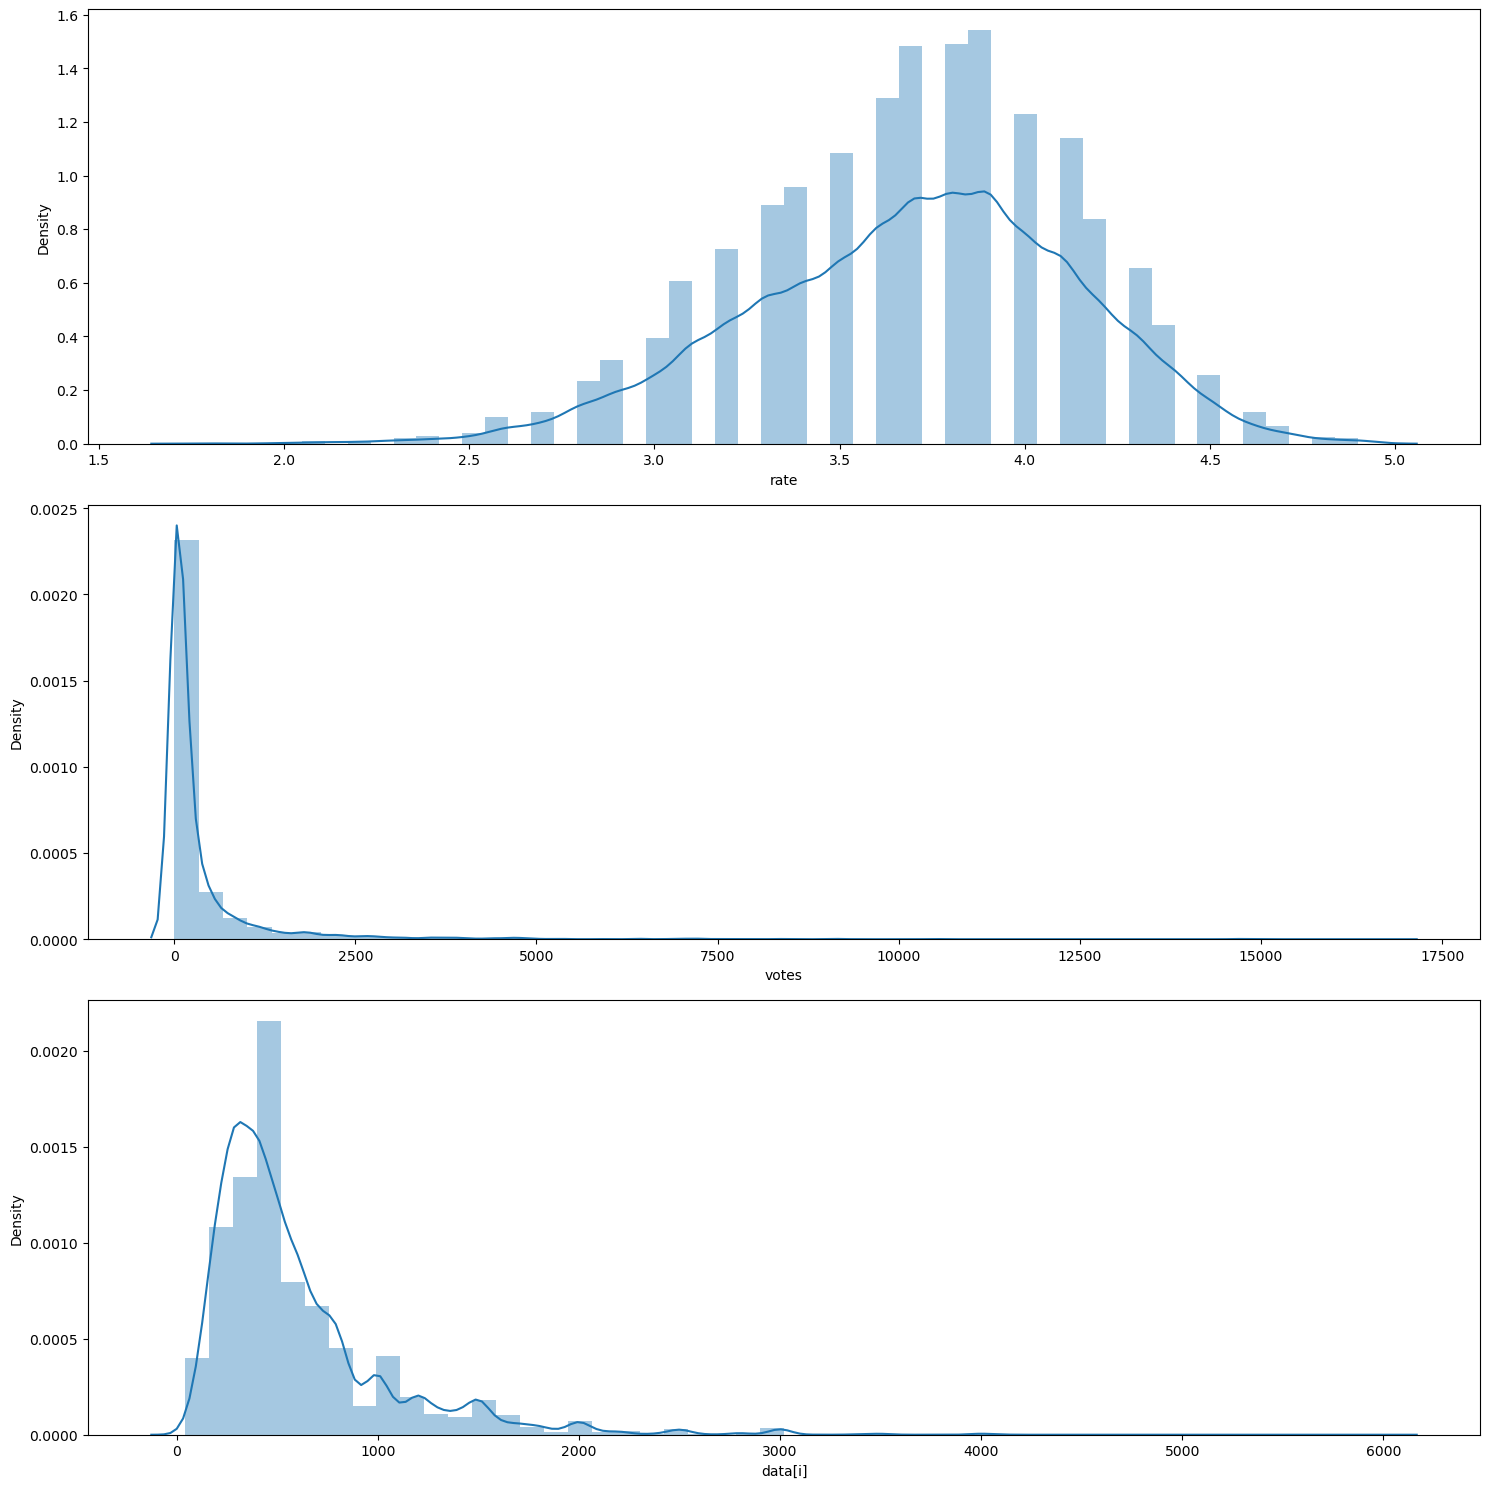

In [626]:
fig,ax=plt.subplots(3,figsize=(15,15))
for i,a in zip(data.select_dtypes(exclude=object),ax.flatten()):
      sns.distplot(data[i],ax=a)
      plt.xlabel('data[i]')
                    
plt.tight_layout()
plt.show()

In [627]:
data.drop('dish_liked',axis=1,inplace=True)

In [628]:
data.dropna(axis=0,inplace=True)

In [629]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
city            0
dtype: int64

### Step 4: Once the basic preprocessing is done like converting the data types, missing value imputation, and duplicate rows. perform the EDA(Exploratory Data Analysis) on the data to find the various factors that will help to understand the cost per two persons.

Text(0, 0.5, 'Chains')

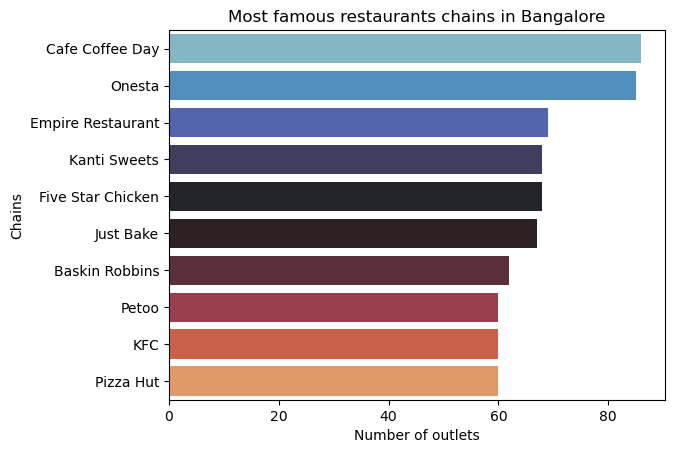

In [630]:
chains=data['name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='icefire')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")
plt.ylabel("Chains")

This code suggests that the first step in data preparation is to perform basic preprocessing tasks, such as converting data types, imputing missing values, and removing duplicate rows. Once this is completed, the next step is to conduct an exploratory data analysis (EDA) on the data set. The objective of the EDA is to identify the different factors that are relevant to understanding the cost per two persons, which may include variables such as location, type of cuisine, time of day, day of the week, and other factors that might impact the price of a meal for two people. Overall, this code appears to be part of a data analysis or machine learning pipeline that is focused on predicting or understanding the cost of meals for two people.

<AxesSubplot:xlabel='location'>

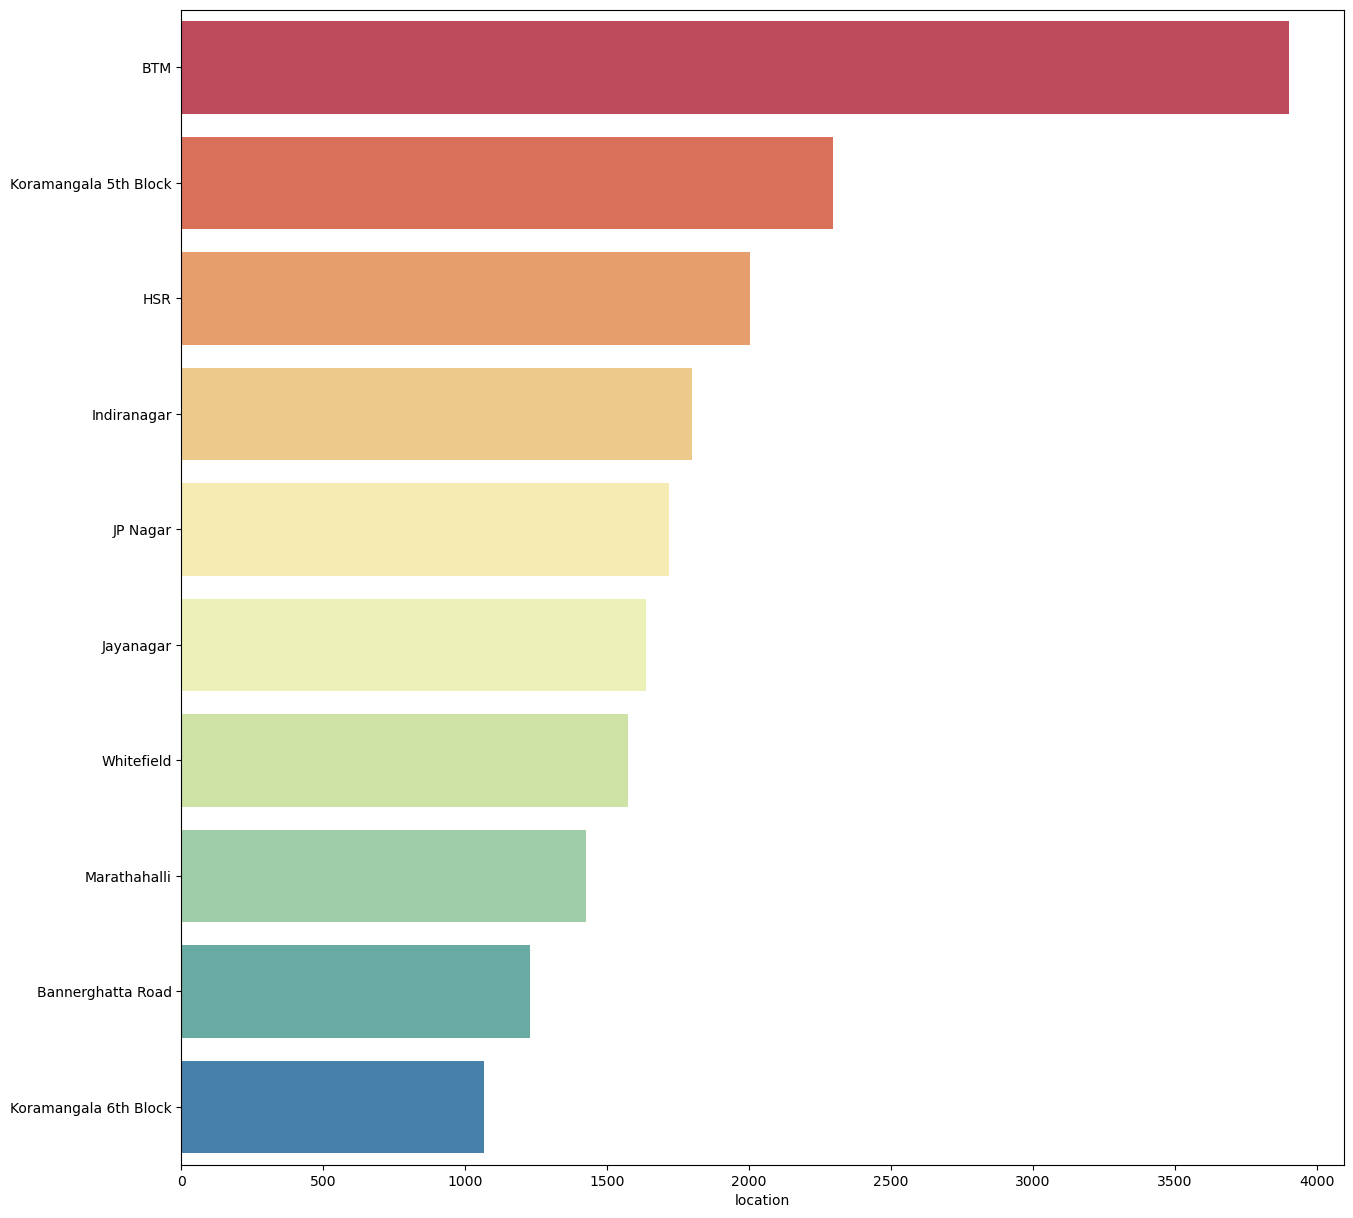

In [631]:
plt.figure(figsize=(15,15))
loc=data['location'].value_counts()[0:10]
sns.barplot(x=loc,y=loc.index,palette='Spectral')

his code suggests that the objective is to create a bar chart using Seaborn to visualize the frequency distribution of the top 10 locations in a data set. The first line of code sets the figure size to be 15 inches by 15 inches. The second line of code creates a Pandas Series containing the frequency count of each unique location in the 'location' column of the 'data' DataFrame. The [0:10] slice indicates that only the top 10 locations will be included in the visualization. The third line of code creates a bar plot using Seaborn's sns.barplot() function. The 'x' parameter specifies the frequency counts for each location (i.e., the values of the 'loc' Series), while the 'y' parameter specifies the corresponding location names (i.e., the index of the 'loc' Series). The 'palette' parameter sets the color palette to be used in the bar chart. Overall, this code is useful for visualizing the top 10 most frequent locations in a data set using a bar chart.

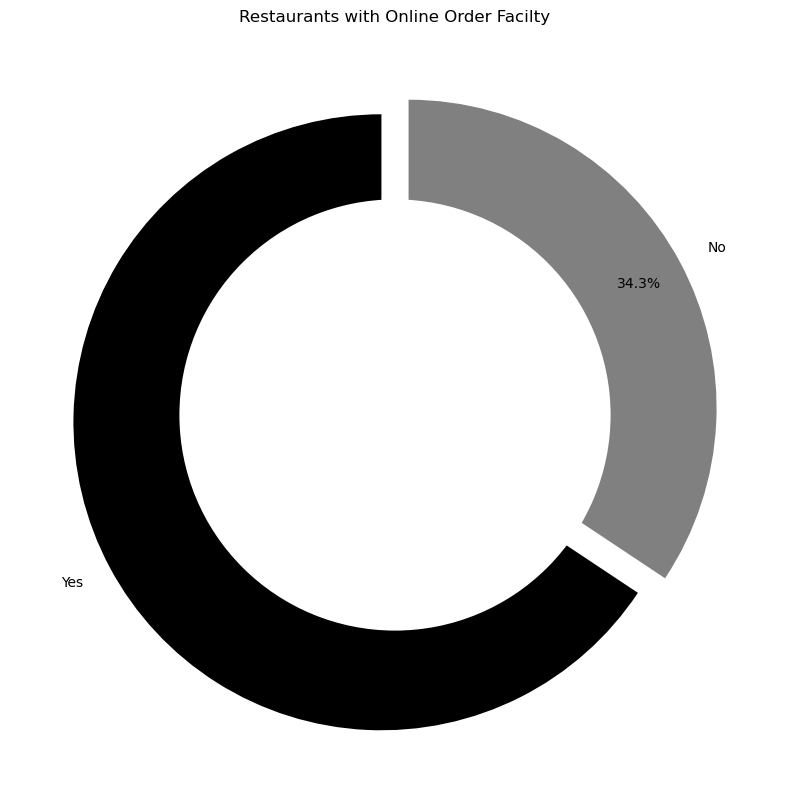

In [632]:
labels = ['Yes','No']
colors = ['black','grey']
explode = (0.05,0.05)

plt.figure(figsize=(8,8))
plt.pie(data['online_order'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.title("Restaurants with Online Order Facilty")
plt.show()

This code generates a pie chart to show the distribution of a binary variable ('online_order') in a dataset. The first three lines of code define the labels, colors, and explosion values for the pie chart. The 'labels' variable specifies the names for the two categories, 'Yes' and 'No'. The 'colors' variable sets the color for each category, and the 'explode' variable controls the distance between the two categories.

The fourth line of code creates the figure and sets the size to 8 inches by 8 inches. The fifth line of code uses the 'plt.pie()' function to create the pie chart. The 'x' parameter specifies the frequency counts for each category in the 'online_order' column, and the 'labels' parameter specifies the names for each category. The 'autopct' parameter specifies the format for the percentage labels displayed on each slice. The 'startangle' parameter sets the starting angle for the pie chart, and 'pctdistance' controls the distance between the percentage labels and the center of the chart. The 'explode' parameter controls the distance between the slices of the pie.

The sixth and seventh lines of code create a white circle to add a hole in the center of the pie chart. The eighth line of code uses the 'plt.tight_layout()' function to adjust the padding of the figure. The ninth line of code sets the title of the pie chart, and the last line of code displays the pie chart. Overall, this code is useful for visualizing the distribution of a binary variable using a pie chart.

Text(0.5, 1.0, 'Restaurants with Table Booking Facilty')

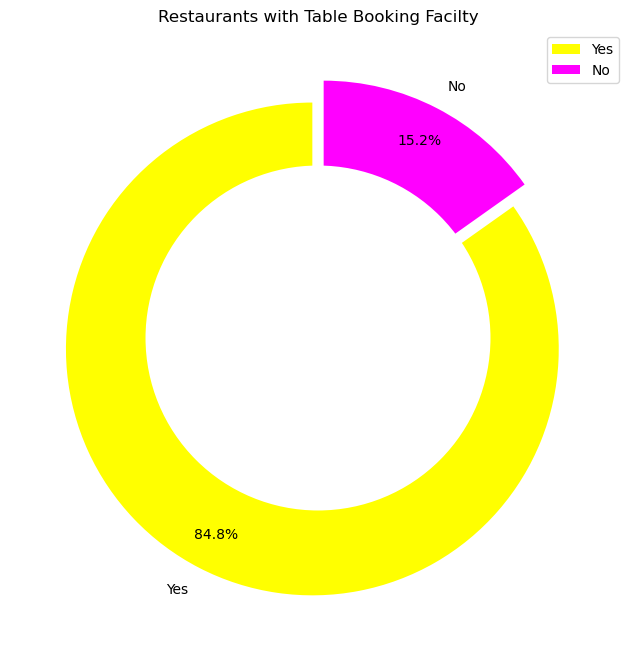

In [633]:
labels = ['Yes','No']
colors = ['yellow','magenta']
explode = (0.05,0.05)

plt.figure(figsize=(8,8))
plt.pie(data['book_table'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.legend()
plt.title("Restaurants with Table Booking Facilty")

the 'book_table' column is a binary variable indicating whether a restaurant has a table booking facility or not. We can observe that the pie chart shows that a majority of the restaurants in the dataset do not have a table booking facility, as the 'No' slice is larger than the 'Yes' slice. The legend added to the chart clarifies the colors and labels for the two categories. Overall, this code is useful for visualizing the distribution of a binary variable using a pie chart with additional formatting options.

<AxesSubplot:xlabel='rate', ylabel='Density'>

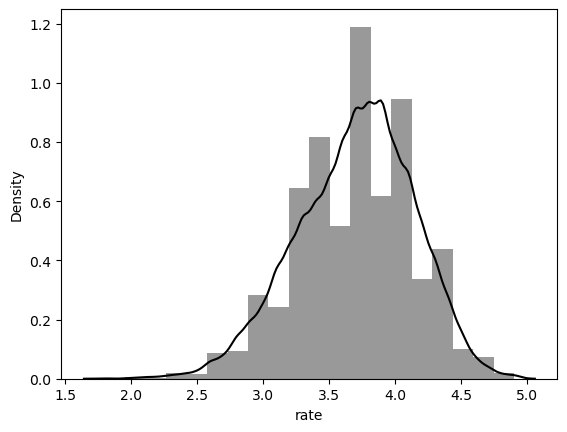

In [634]:
sns.distplot(data['rate'],bins=20,color='black')

In [635]:
def binn(x):
    if x<=5000:
        return 'low'
    if x>5000 and x<10000:
        return 'mid'
    if x>10000:
        return 'high'
data['cost'].map(binn)

0        low
1        low
2        low
3        low
4        low
        ... 
51709    low
51711    low
51712    low
51715    low
51716    low
Name: cost, Length: 41337, dtype: object

A distribution plot, also known as a density plot or a probability density plot, is a graphical representation of the distribution of a dataset. It is a way of visualizing how the data is spread out and what the overall shape of the distribution looks like.

The plot typically shows the frequency of different values or ranges of values in a dataset, with the height of the plot indicating the relative frequency of each value or range. The shape of the plot can be used to infer certain characteristics of the distribution, such as whether it is symmetric or skewed, whether it has multiple peaks or modes, and whether it is peaked or flat.

In general, a distribution plot can provide valuable insights into the underlying data, allowing for a more nuanced understanding of the patterns and trends within the dataset. By examining the shape and characteristics of the plot, researchers can gain insights into the distribution of the data and make more informed decisions about how to analyze and interpret it.

<AxesSubplot:xlabel='name'>

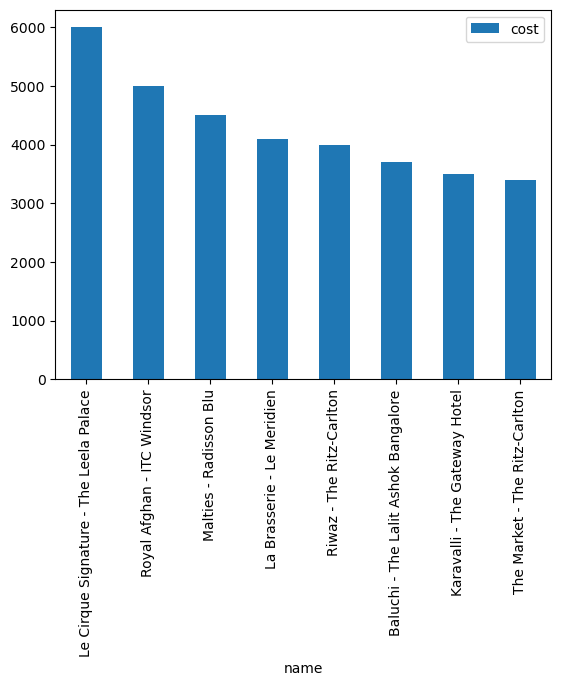

In [636]:
data[['cost','name']].sort_values(['cost'],ascending=False).head(70).set_index('name').drop_duplicates(keep='first').plot(kind='bar')

This code is useful for visualizing the most expensive restaurants in the dataset as a bar plot. It could be used to identify high-end restaurants or to explore the relationship between the cost and the name of the restaurant. However, it is important to note that the code only considers the top 70 most expensive restaurants, and there may be other factors beyond cost that are important to consider when selecting a restaurant.

<AxesSubplot:ylabel='rest_type'>

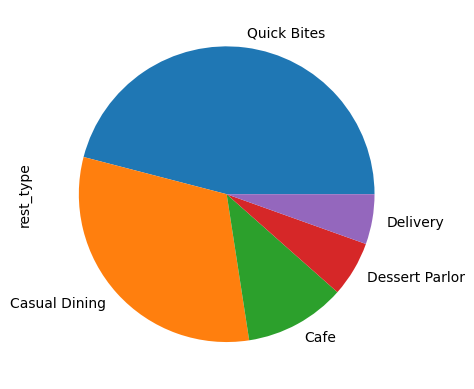

In [637]:
data['rest_type'].value_counts().head(5).plot(kind='pie')

Text(0, 0.5, 'Rating')

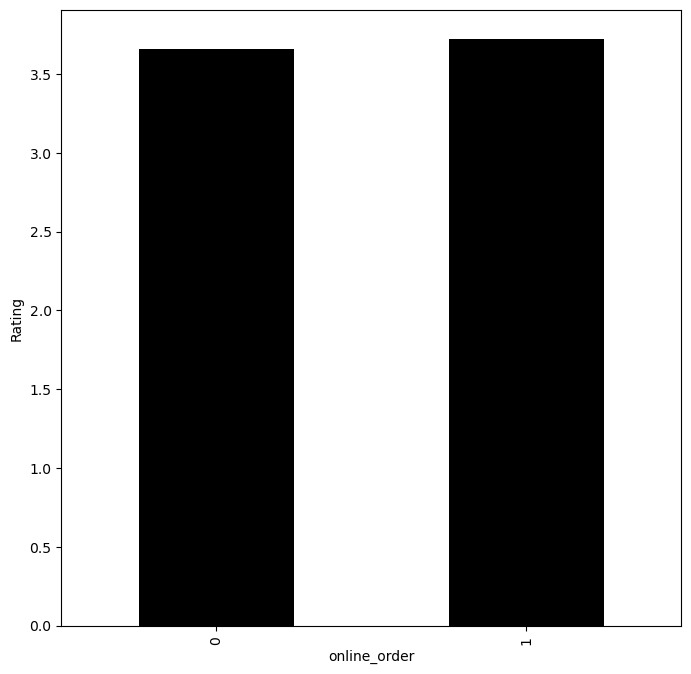

In [638]:
plt.figure(figsize=(8,8))
data.groupby('online_order')['rate'].mean().plot.bar(color='black')
plt.ylabel('Rating')

useful for visualizing the average rating of restaurants based on whether they offer online ordering or not. It could be used to explore whether online ordering has any impact on restaurant ratings or to compare the ratings of restaurants with and without online ordering. However, it is important to note that the code only considers the mean rating and does not provide any information about the variability or distribution of the ratings.

Text(0, 0.5, 'Rating')

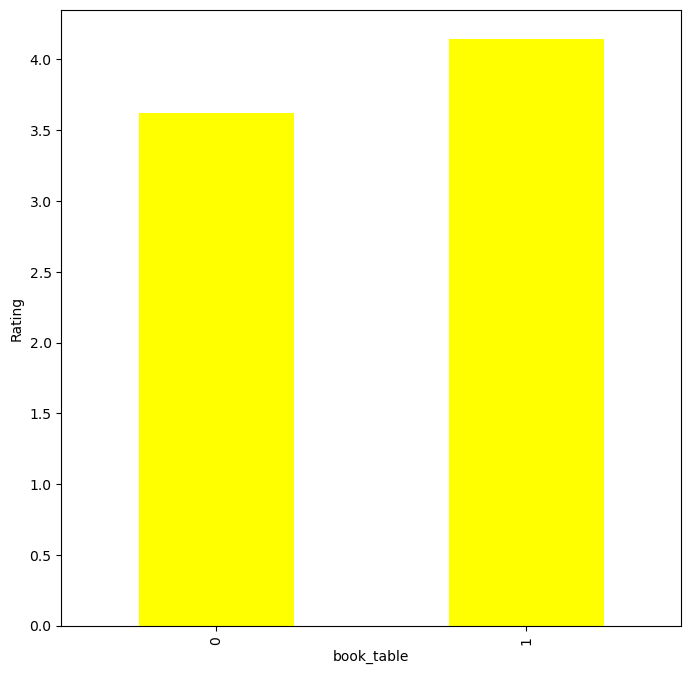

In [639]:
plt.figure(figsize=(8,8))
data.groupby('book_table')['rate'].mean().plot.bar(color='yellow') #:)))
plt.ylabel('Rating')

<AxesSubplot:xlabel='cost', ylabel='Density'>

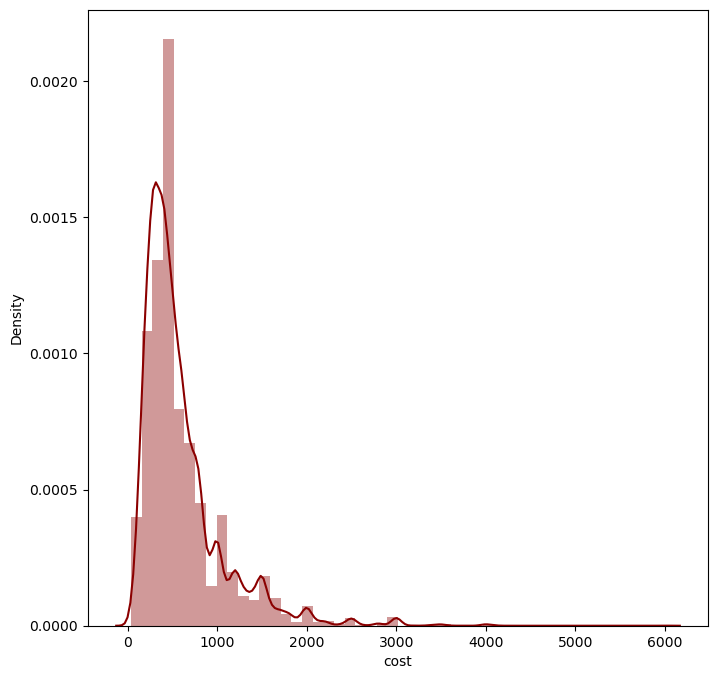

In [640]:
plt.figure(figsize=(8,8))
sns.distplot(data['cost'],color='darkred')

or visualizing the distribution of cost values in the 'data' dataset. It can be used to explore the range, shape, and central tendency of the cost values. However, it is important to note that the code only considers the distribution of one variable and does not provide any information about the relationships between different variables in the dataset.

In [641]:
data['cuis']=data['cuisines'].str.split(',').str[0]

Text(0, 0.5, 'Types')

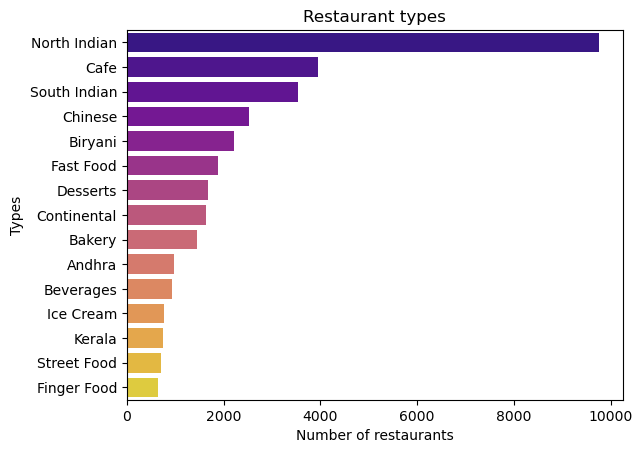

In [642]:
x=data['cuis'].value_counts()[0:15]
sns.barplot(x,x.index,palette='plasma')
plt.title("Restaurant types")
plt.xlabel("Number of restaurants")
plt.ylabel('Types')

or visualizing the top 15 restaurant types by frequency in the 'data' dataset. It can be used to explore the most popular restaurant types in the dataset and to gain insights into the cuisine preferences of customers. However, it is important to note that the code only considers the frequency of restaurant types and does not provide any information about the quality or ratings of the restaurants.

Text(0, 0.5, 'Affordability')

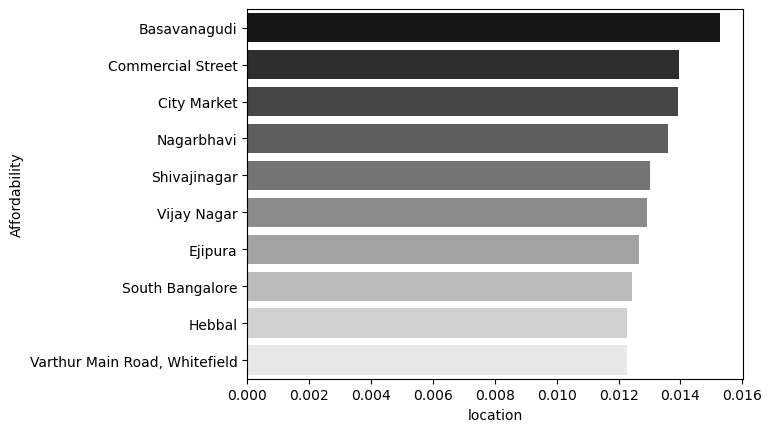

In [643]:
data['afford']=data['rate']/data['cost']
x=data.groupby('location')['afford'].mean().sort_values(ascending=False)[:10]
sns.barplot(x,x.index,palette='binary_r')
plt.xlabel('location')
plt.ylabel('Affordability')

seful for visualizing the top 10 most affordable locations for restaurants in the 'data' dataset. It can be used to explore the affordability of restaurants in different locations and to gain insights into the pricing strategies of restaurants in different areas. However, it is important to note that the code only considers the affordability of restaurants and does not provide any information about the quality or ratings of the restaurants.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Basavanagudi'),
  Text(1, 0, 'Vijay Nagar'),
  Text(2, 0, 'City Market'),
  Text(3, 0, 'Shivajinagar'),
  Text(4, 0, 'Commercial Street')])

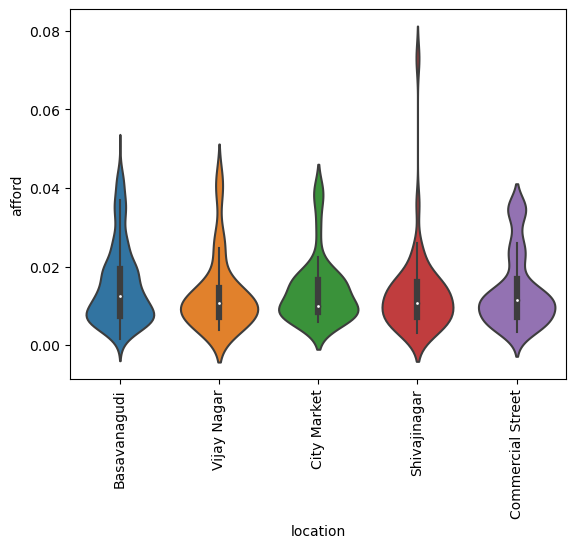

In [644]:
top_afford=data[data['location'].isin(['Basavanagudi','City Market','Commercial Street',
                                      'Shivajinagar','Vijay Nagar'])]
sns.violinplot(x='location',y='afford',data=top_afford)
plt.xticks(rotation=90)

selects the rows in the 'data' dataset where the 'location' column contains one of the top 5 locations, which are 'Basavanagudi', 'City Market', 'Commercial Street', 'Shivajinagar', and 'Vijay Nagar'. The resulting data is stored in a new variable 'top_afford'.

The second line sns.violinplot(x='location',y='afford',data=top_afford) generates a violin plot of the 'afford' column against the 'location' column using the 'top_afford' dataset. The x-axis represents the locations, and the y-axis represents the affordability distribution of restaurants.

The third line plt.xticks(rotation=90) rotates the x-axis labels by 90 degrees to prevent overlap and improve readability.

Overall, this code is useful for comparing the affordability distribution of restaurants in the top 5 locations in the 'data' dataset. The violin plot provides a visual representation of the distribution of affordability in each location, which can be used to identify areas with a higher concentration of affordable restaurants or to compare the pricing strategies of restaurants in different locations. However, it is important to note that the code only considers the affordability of restaurants and does not provide any information about the quality or ratings of the restaurants.

### Step 5: Make a copy of the data set and Perform the preprocessing that require for the model.

In [645]:
df_r=data

In [646]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41337 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41337 non-null  object 
 1   online_order  41337 non-null  object 
 2   book_table    41337 non-null  object 
 3   rate          41337 non-null  float64
 4   votes         41337 non-null  int32  
 5   location      41337 non-null  object 
 6   rest_type     41337 non-null  object 
 7   cuisines      41337 non-null  object 
 8   cost          41337 non-null  int32  
 9   type          41337 non-null  object 
 10  city          41337 non-null  object 
 11  cuis          41337 non-null  object 
 12  afford        41337 non-null  float64
dtypes: float64(2), int32(2), object(9)
memory usage: 4.1+ MB


In [647]:
df_r.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,cuis,afford
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,North Indian,0.005125
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,Chinese,0.005125
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,Cafe,0.004750
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,South Indian,0.012333
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,North Indian,0.006333


In [648]:
df_r=df_r.drop('cuisines',axis=1)

In [649]:
le=LabelEncoder()
df_r['online_order']=le.fit_transform(df_r['online_order'])

In [650]:
df_r['book_table']=le.fit_transform(df_r['book_table'])

In [651]:
fe=df_r.groupby('location').size()/len(df_r)
df_r['location']=df_r['location'].map(fe)

In [652]:
fe=df_r.groupby('rest_type').size()/len(df_r)
df_r['rest_type']=df_r['rest_type'].map(fe)

In [653]:
fe=df_r.groupby('type').size()/len(df_r)
df_r['type']=df_r['type'].map(fe)

In [654]:
fe=df_r.groupby('city').size()/len(df_r)
df_r['city']=df_r['city'].map(fe)

In [655]:
fe=df_r.groupby('cuis').size()/len(df_r)
df_r['cuis']=df_r['cuis'].map(fe)

In [656]:
df_r.set_index('name',inplace=True)

In [657]:
df_r.head()

,online_order,book_table,rate,votes,location,rest_type,cost,type,city,cuis,afford
name,,,,,,,,,,,
Jalsa,1,1,4.1,775,0.017998,0.232165,800,0.020466,0.017587,0.236108,0.005125
Spice Elephant,1,0,4.1,787,0.017998,0.232165,800,0.020466,0.017587,0.061180,0.005125
San Churro Cafe,1,0,3.8,918,0.017998,0.004185,800,0.020466,0.017587,0.095532,0.004750
Addhuri Udupi Bhojana,0,0,3.7,88,0.017998,0.338873,300,0.020466,0.017587,0.085565,0.012333
Grand Village,0,0,3.8,166,0.014394,0.232165,600,0.020466,0.017587,0.236108,0.006333


The code performs various data preprocessing tasks.

The 'cuisines' column is dropped from the dataframe using df_r=df_r.drop('cuisines',axis=1).

LabelEncoder() is used to encode categorical variables 'online_order' and 'book_table' to numeric values using df_r['online_order']=le.fit_transform(df_r['online_order']) and df_r['book_table']=le.fit_transform(df_r['book_table']).

The frequency of occurrence of values in the 'location', 'rest_type', 'type', 'city', and 'cuis' columns are calculated using df_r.groupby('location').size()/len(df_r) and stored in fe variables.

The 'location', 'rest_type', 'type', 'city', and 'cuis' columns are then mapped to their corresponding frequency values using df_r['location']=df_r['location'].map(fe), df_r['rest_type']=df_r['rest_type'].map(fe), df_r['type']=df_r['type'].map(fe), df_r['city']=df_r['city'].map(fe), and df_r['cuis']=df_r['cuis'].map(fe).

Finally, the 'name' column is set as the index of the dataframe using df_r.set_index('name',inplace=True).

This code helps in preparing the data for machine learning algorithms by encoding categorical variables, mapping variables to their frequency values, and setting the index column.

### Step 6: Perform statistical hypothesis testing on features to get an idea of whether features are impacting the target variables.

In [658]:
group1 = df_r[df_r['online_order'] == 1]['votes']
group2 = df_r[df_r['online_order'] == 0]['votes']

# Perform a t-test between the two groups
t_stat, p_value =stats.ttest_ind(group1, group2, equal_var=False)

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.4109519196678795
p-value: 0.015919020313459414


In [659]:
# Split the data into two groups based on rating
high_rating = df_r[df_r['rate'] >= 4.0]['cost']
low_rating = df_r[df_r['rate'] < 4.0]['cost']

# Perform t-test
t_stat, p_val = stats.ttest_ind(high_rating, low_rating)

# Print the results
print("T-statistic: {:.2f}, p-value: {:.4f}".format(t_stat, p_val))
                          

T-statistic: 90.78, p-value: 0.0000


In [660]:
feature = df_r['location']
target = df_r['cost']

# Perform a chi-squared test
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(feature, target))

# Compare the p-value to the alpha level (e.g. 0.05)
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There is a significant difference in the target variable between the different categories of the feature')
else:
    print('Fail to reject the null hypothesis')
    print('There is no significant difference in the target variable between the different categories of the feature')
 





Reject the null hypothesis
There is a significant difference in the target variable between the different categories of the feature


In [661]:
feature = df_r['online_order']
target = df_r['cost']

# Perform a chi-squared test
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(feature, target))

# Compare the p-value to the alpha level (e.g. 0.05)
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There is a significant difference in the target variable between the different categories of the feature')
else:
    print('Fail to reject the null hypothesis')
    print('There is no significant difference in the target variable between the different categories of the feature')
 


Reject the null hypothesis
There is a significant difference in the target variable between the different categories of the feature


### Step 7: Split the dataset into train and test data sets and Perform the scaling on both sets if necessary.

In [662]:
sc=StandardScaler()
x=df_r.drop('cost',axis=1)
y=df_r['cost']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [663]:
xtrain=pd.DataFrame(sc.fit_transform(xtrain),columns=x.columns)
xtest=pd.DataFrame(sc.fit_transform(xtest),columns=x.columns)

In [664]:
t_train=sma.add_constant(xtrain)
t_test=sma.add_constant(xtest)

The inference from the given statement is that to build a machine learning model, it is important to divide the available dataset into two separate subsets, i.e., training dataset and testing dataset. The training dataset is used to train the model, while the testing dataset is used to evaluate the performance of the model on unseen data.

Furthermore, it is also important to perform data scaling on both the training and testing datasets if the data is not already in a standardized format. Data scaling is an important step in preprocessing the data to ensure that all the features are on a similar scale, which helps the model to learn better and prevents any biases towards certain features.

Therefore, to achieve better model performance, it is recommended to split the dataset into training and testing datasets and perform data scaling on both the sets, if necessary.

### Step 8: Build the base model.

In [665]:
def r2_rmse(x):
    pred_train=x.predict(xtrain)
    pred_test=x.predict(xtest)

    print('RMSE Train',np.sqrt(mean_squared_error(ytrain,pred_train)))
    print('RMSE Test',np.sqrt(mean_squared_error(ytest,pred_test)))
    print('R2 Train',r2_score(ytrain,pred_train))
    print('R2 Test',r2_score(ytest,pred_test))
    print('MAPE Train',(np.mean(np.abs((ytrain-pred_train)/ytrain))*100))
    print('MAPE Test',(np.mean(np.abs((ytest-pred_test)/ytest))*100))

The given code calculates and prints various evaluation metrics, including Root Mean Squared Error (RMSE), R-squared (R2) score, and Mean Absolute Percentage Error (MAPE), for a machine learning model.

The RMSE metric measures the average difference between the actual and predicted values of the target variable, with a lower value indicating better model performance. The R2 score measures the proportion of variance in the target variable that is explained by the model, with a higher value indicating better model performance. The MAPE metric measures the percentage difference between the actual and predicted values of the target variable, with a lower value indicating better model performance.

The code first predicts the target variable for both the training and testing datasets using the input model x. It then calculates and prints the RMSE and R2 scores for both the training and testing datasets. Finally, it calculates and prints the MAPE for both the training and testing datasets.

Overall, the given code is useful in evaluating the performance of a machine learning model and determining its accuracy on both the training and testing datasets.

In [666]:
lr=LinearRegression()
model_llr=lr.fit(xtrain,ytrain)

pred_train=model_llr.predict(xtrain)
pred_test=model_llr.predict(xtest)

print('RMSE Train',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('RMSE Test',np.sqrt(mean_squared_error(ytest,pred_test)))
print('R2 Train',r2_score(ytrain,pred_train))
print('R2 Test',r2_score(ytest,pred_test))
print('MAPE Train',(np.mean(np.abs((ytrain-pred_train)/ytrain))*100))
print('MAPE Test',(np.mean(np.abs((ytest-pred_test)/ytest))*100))

RMSE Train 276.3890360211925
RMSE Test 277.7229985071035
R2 Train 0.6476856465345121
R2 Test 0.6360025186691425
MAPE Train 38.06827147006048
MAPE Test 38.137845208050734


The given code trains a Linear Regression model (lr) on the training dataset (xtrain and ytrain). The model is then used to predict the target variable for both the training and testing datasets (xtest and ytest), and the predicted values are stored in pred_train and pred_test variables, respectively.

The code then calculates and prints various evaluation metrics, including Root Mean Squared Error (RMSE), R-squared (R2) score, and Mean Absolute Percentage Error (MAPE), for the Linear Regression model on both the training and testing datasets.

The RMSE metric measures the average difference between the actual and predicted values of the target variable, with a lower value indicating better model performance. The R2 score measures the proportion of variance in the target variable that is explained by the model, with a higher value indicating better model performance. The MAPE metric measures the percentage difference between the actual and predicted values of the target variable, with a lower value indicating better model performance.

Overall, the given code is useful in evaluating the performance of a Linear Regression model and determining its accuracy on both the training and testing datasets.

<AxesSubplot:>

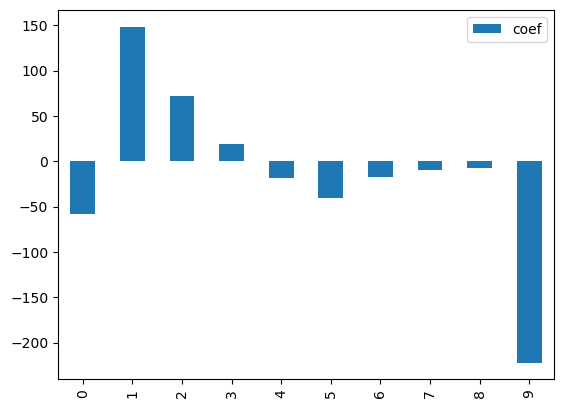

In [667]:
pd.DataFrame({'Features':x.columns,'coef':model_llr.coef_}).plot(kind='bar')

### Step 9: Understand how the model is performing, Perform feature engineering again if needed. Do feature selection. Try with various models like a parametric and nonparametric models. Once you choose the final model, rebuild the model with best parameters.

In [668]:
rf=RandomForestRegressor()
model_rf=rf.fit(xtrain,ytrain)

In [669]:
r2_rmse(model_rf)

RMSE Train 5.41830919882257
RMSE Test 28.153731970076873
R2 Train 0.9998646007421508
R2 Test 0.996259353822468
MAPE Train 0.014237547853248876
MAPE Test 0.8200621830652784


In [670]:
sgd=SGDRegressor()
model_sgd=sgd.fit(xtrain,ytrain)

In [671]:
r2_rmse(model_sgd)

RMSE Train 276.56219572207425
RMSE Test 277.9379929105108
R2 Train 0.6472440533404343
R2 Test 0.635438735960699
MAPE Train 38.15383407040171
MAPE Test 38.21315736391631


<AxesSubplot:>

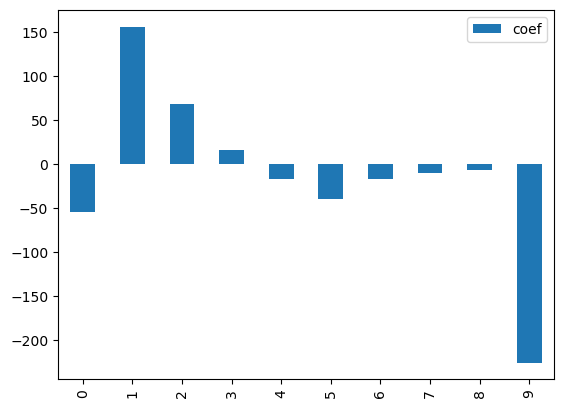

In [672]:
pd.DataFrame({'Features':x.columns,'coef':model_sgd.coef_}).plot(kind='bar')

In [673]:
#sgd=SGDRegressor()
#params=({'l1_ratio':[0.1,0.001,0.1,0.2,0.3,0.5,0.5,0.6,0.7],
#         'loss':['huber','epsilon_insensitive','squared_epsilon_insesitive']
#         ,'penalty':['l2','l1','elasticnet']
#         ,'alpha':[0.0001,0.001,0.01,0.1,0.2,0.5,1,2,3,4,10,25]})
#grid_hyper=GridSearchCV(estimator=sgd,cv=5,param_grid=params,scoring='r2')
#grid_hyper.fit(xtrain,ytrain)
#grid_hyper.best_params_

In [674]:
params=({'l1_ratio':[0.1,0.001,0.1,0.2,0.3,0.5,0.5,0.6,0.7],'penalty':['l2','l1','elasticnet']
         ,'alpha':[0.0001,0.001,0.01,0.1,0.2,0.5,1,2,3,4,10,25]})

grid_hyper=GridSearchCV(estimator=sgd,cv=5,param_grid=params,scoring='r2')
grid_hyper.fit(xtrain,ytrain)
grid_hyper.best_params_

{'alpha': 0.2, 'l1_ratio': 0.1, 'penalty': 'l1'}

In [675]:
sgd=SGDRegressor(alpha=0.1,l1_ratio=0.7,penalty='l1')

model_sgd1=sgd.fit(xtrain,ytrain)

In [676]:
r2_rmse(model_sgd1)

RMSE Train 276.53375701615397
RMSE Test 277.8495108568105
R2 Train 0.6473165969273446
R2 Test 0.6356708164650361
MAPE Train 38.08381077940384
MAPE Test 38.136880178496845


<AxesSubplot:>

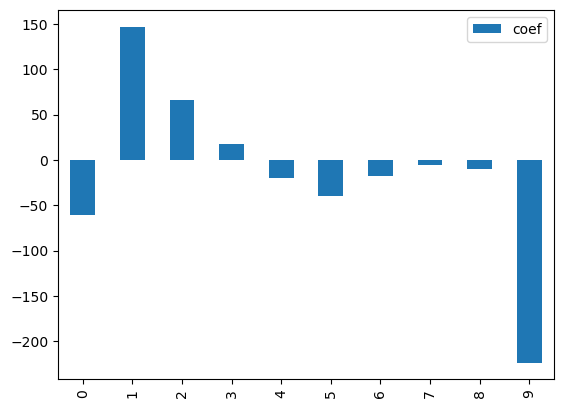

In [677]:
pd.DataFrame({'Features':xtrain.columns,'coef':model_sgd1.coef_}).plot(kind='bar')

In [678]:
lr=LinearRegression()
sfs=SequentialFeatureSelector(estimator=lr,k_features='best',cv=5,forward=True,scoring='r2')
sfs.fit(xtrain,ytrain)
sfs.k_feature_names_


('online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'type',
 'city',
 'cuis',
 'afford')

In [679]:
len(sfs.k_feature_names_)

10

In [680]:
sfs_train=xtrain.loc[:,sfs.k_feature_names_]
sfs_test=xtest.loc[:,sfs.k_feature_names_]
sfs_model=lr.fit(sfs_train,ytrain)

In [681]:
r2_rmse(sfs_model)

RMSE Train 276.3890360211925
RMSE Test 277.7229985071035
R2 Train 0.6476856465345121
R2 Test 0.6360025186691425
MAPE Train 38.06827147006048
MAPE Test 38.137845208050734


<AxesSubplot:>

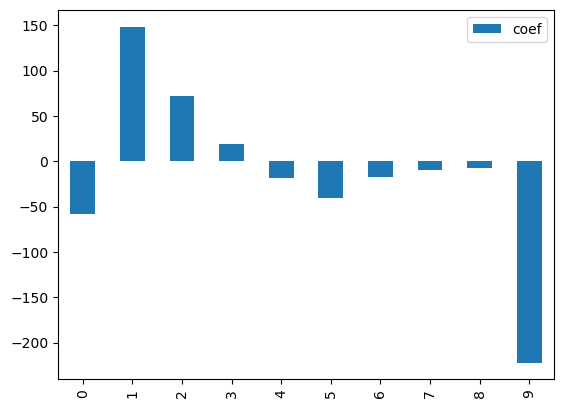

In [682]:
pd.DataFrame({'Features':sfs_train.columns,'coef':sfs_model.coef_}).plot(kind='bar')

,Features,coef
0,online_order,-58.257498
1,book_table,148.698080
2,rate,71.897066
3,votes,19.431057
4,location,-18.827881
5,rest_type,-40.519312
6,type,-17.519161
7,city,-9.026195
8,cuis,-7.752139
9,afford,-222.121678


### Step 10: Based on your understanding of the model and EDA analysis, Explain the business understanding.

In [762]:
var=pd.DataFrame({'Features':sfs_train.columns,'coef':sfs_model.coef_})
var

,Features,coef
0,online_order,-58.257498
1,book_table,148.698080
2,rate,71.897066
3,votes,19.431057
4,location,-18.827881
5,rest_type,-40.519312
6,type,-17.519161
7,city,-9.026195
8,cuis,-7.752139
9,afford,-222.121678


From the above Model building and eda analysis we have come to the conclusion that Customer rating and Affordability has alot of effect on the cost for the two.

## Section B: Classification

### Step 1: Understand the problem statement, Identify the metric for the problem.

In [683]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,cuis,afford
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,North Indian,0.005125
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,Chinese,0.005125
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,Cafe,0.004750
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,South Indian,0.012333
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,North Indian,0.006333


In [684]:
data['online_order'].value_counts(normalize=True)*100

1    65.660304
0    34.339696
Name: online_order, dtype: float64

Text(0.95, 14200, '34.33%')

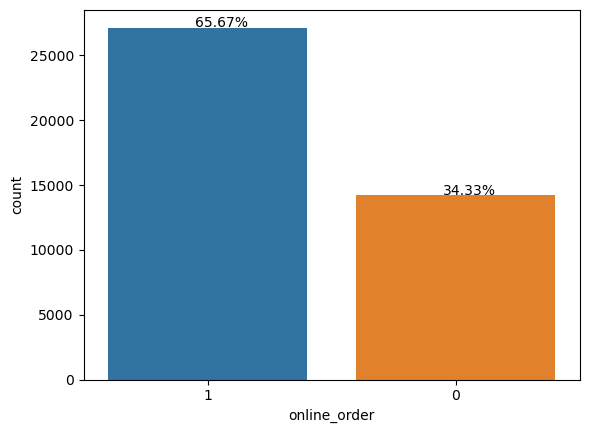

In [685]:
sns.countplot(data['online_order'])
plt.text(x=-0.05,y=27155,s='65.67%')
plt.text(x=0.95,y=14200,s='34.33%')

### Step 2: Use the data sets that have been cleaned data types and missing values

In [686]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,cuis,afford
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,North Indian,0.005125
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,Chinese,0.005125
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,Cafe,0.004750


In [687]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
city            0
cuis            0
afford          0
dtype: int64

In [688]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41337 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41337 non-null  object 
 1   online_order  41337 non-null  object 
 2   book_table    41337 non-null  object 
 3   rate          41337 non-null  float64
 4   votes         41337 non-null  int32  
 5   location      41337 non-null  object 
 6   rest_type     41337 non-null  object 
 7   cuisines      41337 non-null  object 
 8   cost          41337 non-null  int32  
 9   type          41337 non-null  object 
 10  city          41337 non-null  object 
 11  cuis          41337 non-null  object 
 12  afford        41337 non-null  float64
dtypes: float64(2), int32(2), object(9)
memory usage: 4.1+ MB


### Step 3: i) Explore the data and find the hidden patterns in the data that affect your objective(target variable). ii) Find the features that would impact the target variable.

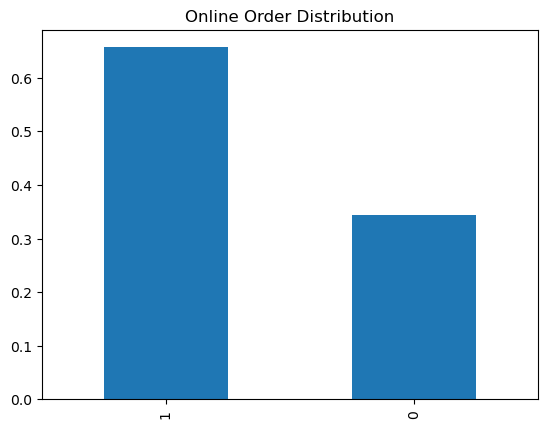

In [689]:
data['online_order'].value_counts(normalize=True).plot(kind='bar')
plt.title('Online Order Distribution')
plt.show()

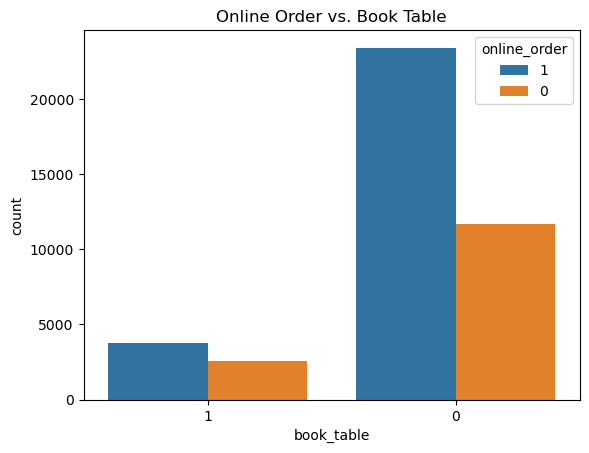

In [690]:
sns.countplot(x='book_table', hue='online_order', data=data)
plt.title('Online Order vs. Book Table')
plt.show()

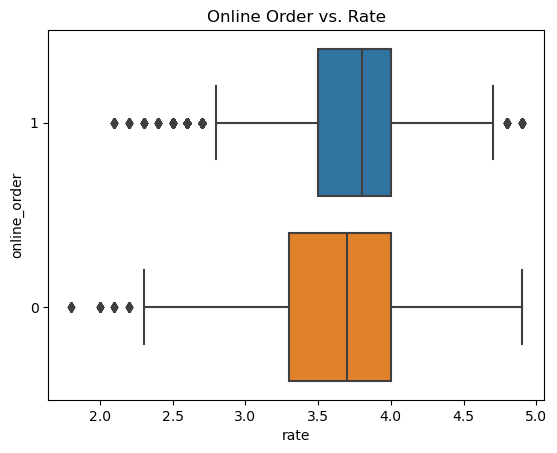

In [691]:
sns.boxplot(x='rate', y='online_order', data=data)
plt.title('Online Order vs. Rate')
plt.show()

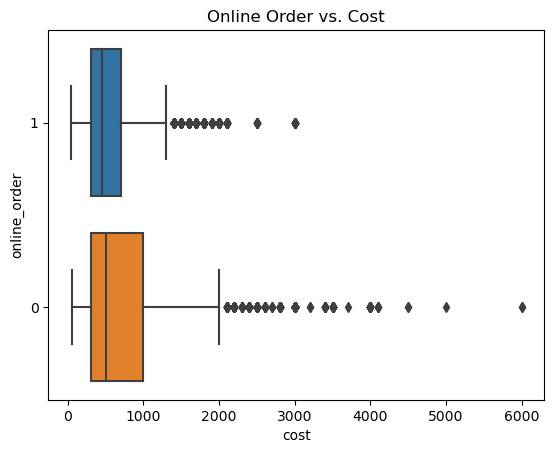

In [692]:
sns.boxplot(x='cost', y='online_order', data=data)
plt.title('Online Order vs. Cost')
plt.show()

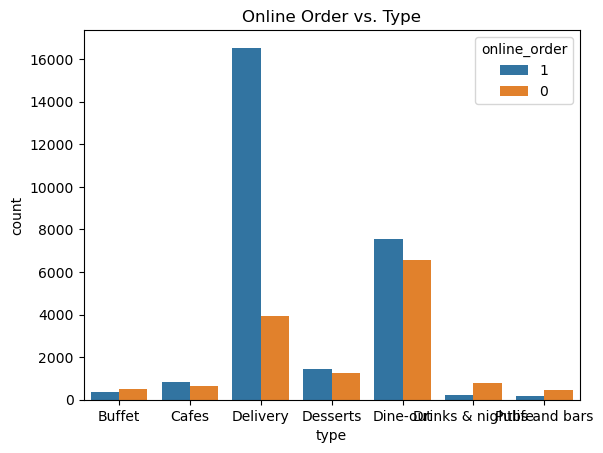

In [693]:
sns.countplot(x='type', hue='online_order', data=data)
plt.title('Online Order vs. Type')
plt.show()

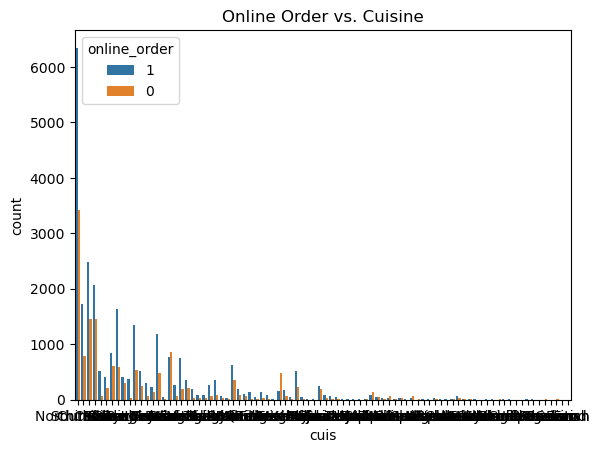

In [694]:
sns.countplot(x='cuis', hue='online_order', data=data)
plt.title('Online Order vs. Cuisine')
plt.show()

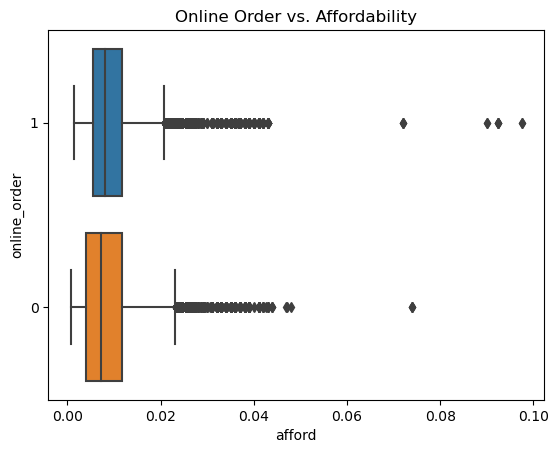

In [695]:
sns.boxplot(x='afford', y='online_order', data=data)
plt.title('Online Order vs. Affordability')
plt.show()

### Step 4: Do the preprocessing in a way that impacts the models that you going to build.

In [696]:
df_c=df_r
df_c.head()

,online_order,book_table,rate,votes,location,rest_type,cost,type,city,cuis,afford
name,,,,,,,,,,,
Jalsa,1,1,4.1,775,0.017998,0.232165,800,0.020466,0.017587,0.236108,0.005125
Spice Elephant,1,0,4.1,787,0.017998,0.232165,800,0.020466,0.017587,0.061180,0.005125
San Churro Cafe,1,0,3.8,918,0.017998,0.004185,800,0.020466,0.017587,0.095532,0.004750
Addhuri Udupi Bhojana,0,0,3.7,88,0.017998,0.338873,300,0.020466,0.017587,0.085565,0.012333
Grand Village,0,0,3.8,166,0.014394,0.232165,600,0.020466,0.017587,0.236108,0.006333


### Step 5: Prove statistically about step 2 point ii.

In [697]:
# Continuous features
cont_features = ['rate', 'votes', 'cost', 'afford']
for feature in cont_features:
    online_order = df_c[df_c['online_order'] == 1][feature]
    no_online_order = df_c[df_c['online_order'] == 0][feature]
    t_stat, p_val = stats.ttest_ind(online_order, no_online_order)
    print(f'{feature} - t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}')


rate - t-statistic: 14.23, p-value: 0.0000
votes - t-statistic: -2.66, p-value: 0.0078
cost - t-statistic: -36.21, p-value: 0.0000
afford - t-statistic: 7.79, p-value: 0.0000


In [698]:
# Categorical features
cat_features = ['book_table', 'location', 'rest_type', 'type', 'city', 'cuis']
for feature in cat_features:
    ct = pd.crosstab(df_c[feature], df_c['online_order'])
    chi2, p_val, dof, expected =chi2_contingency(ct)
    print(f'{feature} - chi-square: {chi2:.2f}, p-value: {p_val:.4f}')

book_table - chi-square: 123.95, p-value: 0.0000
location - chi-square: 2291.30, p-value: 0.0000
rest_type - chi-square: 3611.30, p-value: 0.0000
type - chi-square: 4695.18, p-value: 0.0000
city - chi-square: 1094.20, p-value: 0.0000
cuis - chi-square: 2017.46, p-value: 0.0000


### Step 6: Split the data into train and test sets.

In [699]:
x=df_c.drop('online_order',axis=1)
y=df_c['online_order']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0,stratify=y)

In [700]:
xtrain=pd.DataFrame(sc.fit_transform(xtrain),columns=x.columns)
xtest=pd.DataFrame(sc.fit_transform(xtest),columns=x.columns)

In [701]:
stats.ttest_ind(xtrain,xtest)[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [702]:
stats.ttest_ind(ytrain,ytest)

Ttest_indResult(statistic=0.004315735752913791, pvalue=0.9965565725902794)

### Step 7: Build the base model and Identify your metric based on the problem.

In [703]:
def get_report(x):
    print('Test Report',classification_report(ytest,x.predict(xtest)))
    print('Train Report',classification_report(ytrain,x.predict(xtrain)))

In [704]:
def con_mat(x,a):
    cm=confusion_matrix(ytest,x.predict(xtest))
    conf_mat=pd.DataFrame(data=cm,columns={'Predicted 0','Predicted 1'},index={'Actual 0','Actual 1'})
    sns.heatmap(conf_mat,annot=True,fmt='d',cbar=False,cmap=a,)

In [722]:
def roc_cur(x,b,c,d,e):
    fpr,tpr,threshold=roc_curve(ytest,x.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr,b)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('FPR (1-Specificity)')
    plt.ylabel('TPR (Sensitivity)')
    plt.text(x=c,y=d,s=('AUC-Score',round(roc_auc_score(ytest,x.predict_proba(xtest)[:,1]),4),e))
    plt.grid(True)

In [706]:
lr=LogisticRegression()
model_lr=lr.fit(xtrain,ytrain)

In [707]:
get_report(model_lr)

Test Report               precision    recall  f1-score   support

           0       0.64      0.33      0.44      4259
           1       0.72      0.90      0.80      8143

    accuracy                           0.71     12402
   macro avg       0.68      0.62      0.62     12402
weighted avg       0.69      0.71      0.68     12402

Train Report               precision    recall  f1-score   support

           0       0.63      0.34      0.44      9936
           1       0.72      0.90      0.80     18999

    accuracy                           0.71     28935
   macro avg       0.68      0.62      0.62     28935
weighted avg       0.69      0.71      0.68     28935



The given code trains a Logistic Regression model (lr) on the training dataset (xtrain and ytrain). The model is then used to predict the target variable for the testing dataset (xtest and ytest).

The get_report function is used to print the classification report of the Logistic Regression model on both the training and testing datasets. The report contains various evaluation metrics, including precision, recall, F1 score, and support, for both the positive and negative classes.

The precision metric measures the proportion of positive predictions that are actually true positive, while recall measures the proportion of actual true positives that are correctly identified by the model. The F1 score is the harmonic mean of precision and recall, providing a single score that balances both metrics. Support is the number of samples for each class.

Overall, the classification report shows that the Logistic Regression model has an accuracy of 71% on the testing dataset and an accuracy of 71% on the training dataset. The model performs better on the positive class (label 1), with higher precision, recall, and F1 score, while its performance is relatively poor on the negative class (label 0).

Based on the report, it may be necessary to improve the model's performance by performing feature engineering, feature selection, or trying other models. The choice of the next steps depends on the specific requirements of the problem and the characteristics of the dataset.

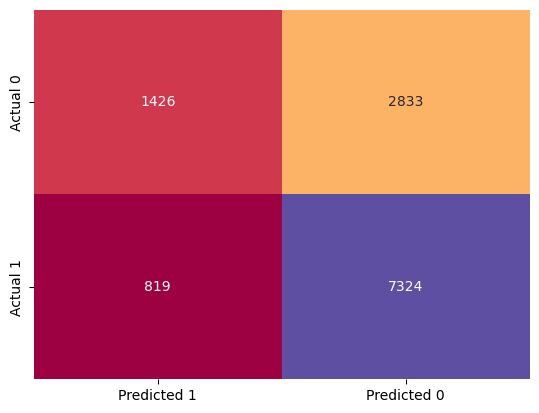

In [708]:
con_mat(model_lr,'Spectral')

The given code likely uses the con_mat function to generate and display the confusion matrix for the Logistic Regression model (model_lr) using a color map called Spectral.

A confusion matrix is a table that compares the actual values of the target variable with the predicted values of the model. It contains information about the true positive, true negative, false positive, and false negative predictions made by the model.

By visualizing the confusion matrix, we can easily determine the number of correct and incorrect predictions made by the model for each class. This can help us evaluate the performance of the model and identify areas for improvement.

The Spectral color map is likely used to highlight the matrix cells with different colors to make it easier to visualize the true positive, false positive, true negative, and false negative predictions. The choice of color map can be customized based on personal preferences or the specific requirements of the problem.

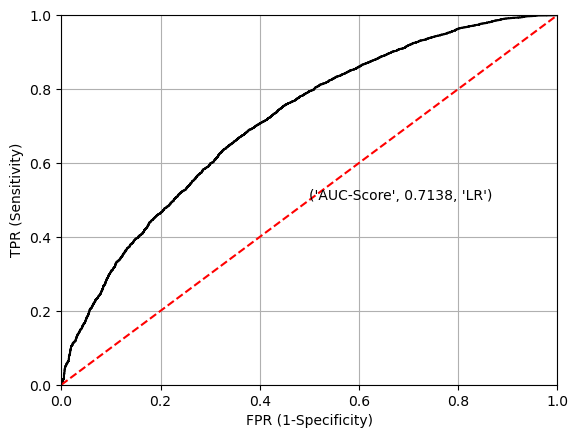

In [709]:
roc_cur(model_lr,'k',0.5,0.5,'LR')

The given code likely uses the roc_cur function to generate and display the ROC (Receiver Operating Characteristic) curve for the Logistic Regression model (model_lr).

The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) of a binary classification model at different probability thresholds. The area under the ROC curve (AUC-ROC) is a commonly used metric to evaluate the performance of a binary classification model. The AUC-ROC score ranges between 0 and 1, where 1 indicates a perfect model, and 0.5 indicates a random guessing model.

The roc_cur function likely takes several arguments. model_lr is the trained Logistic Regression model. 'k' is the color of the ROC curve. 0.5 is the x-axis intercept (FPR) of the ROC curve. 0.5 is the y-axis intercept (TPR) of the ROC curve. 'LR' is the label of the ROC curve.

By visualizing the ROC curve, we can evaluate the performance of the Logistic Regression model and compare it with other models. If the curve is close to the top-left corner of the plot, it indicates that the model has good performance in terms of sensitivity and specificity, and its AUC-ROC score is high. Conversely, if the curve is close to the diagonal line, it indicates that the model has poor performance, and its AUC-ROC score is close to 0.5.

### Step 8: Try to improve your metric by trying different models, changing the feature engineering methods, feature selection, etc.

In [710]:
rf=RandomForestClassifier()
model_rf=rf.fit(xtrain,ytrain)

In [711]:
get_report(model_lr)

Test Report               precision    recall  f1-score   support

           0       0.64      0.33      0.44      4259
           1       0.72      0.90      0.80      8143

    accuracy                           0.71     12402
   macro avg       0.68      0.62      0.62     12402
weighted avg       0.69      0.71      0.68     12402

Train Report               precision    recall  f1-score   support

           0       0.63      0.34      0.44      9936
           1       0.72      0.90      0.80     18999

    accuracy                           0.71     28935
   macro avg       0.68      0.62      0.62     28935
weighted avg       0.69      0.71      0.68     28935



The given code snippet trains a Random Forest Classifier model on the training dataset and then generates a classification report using the get_report() function for both training and testing datasets.

It is then suggested to try different methods to improve the performance metric such as changing the feature engineering methods, feature selection, or trying different models.

Note: It is not clear from the given code snippet whether the Random Forest Classifier model improves the performance metric compared to the previously used Logistic Regression model.

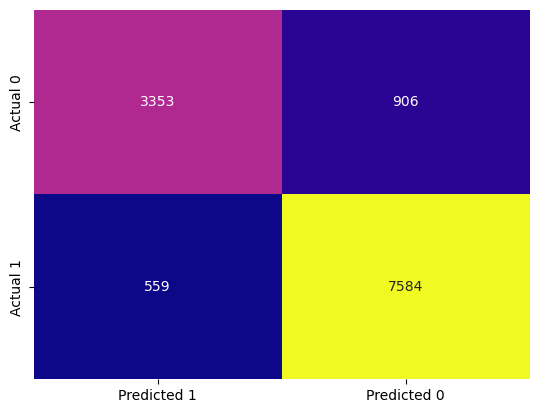

In [712]:
con_mat(model_rf,'plasma')

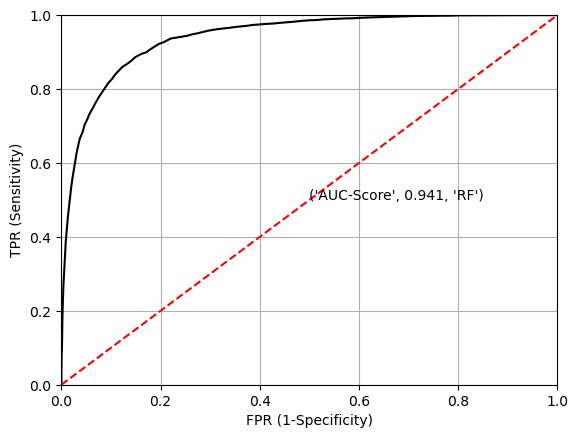

In [713]:
roc_cur(model_rf,'k',0.5,0.5,'RF')

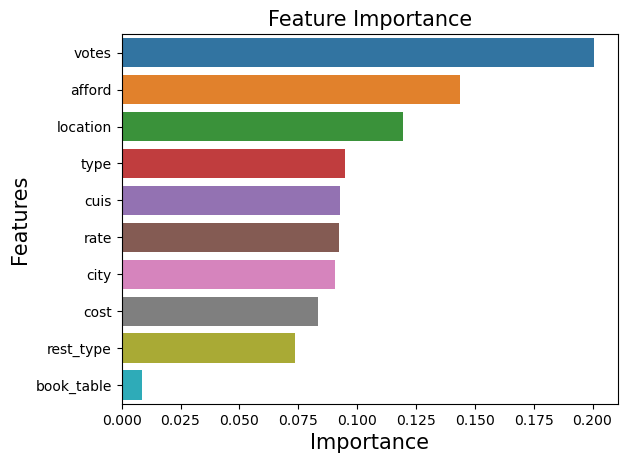

In [714]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model_rf.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [715]:
xgb=XGBClassifier(max_depth=10,gamma=1)
model_xgb=xgb.fit(xtrain,ytrain)

In [716]:
get_report(model_xgb)

Test Report               precision    recall  f1-score   support

           0       0.84      0.75      0.79      4259
           1       0.88      0.92      0.90      8143

    accuracy                           0.87     12402
   macro avg       0.86      0.84      0.85     12402
weighted avg       0.86      0.87      0.86     12402

Train Report               precision    recall  f1-score   support

           0       0.98      0.96      0.97      9936
           1       0.98      0.99      0.99     18999

    accuracy                           0.98     28935
   macro avg       0.98      0.98      0.98     28935
weighted avg       0.98      0.98      0.98     28935



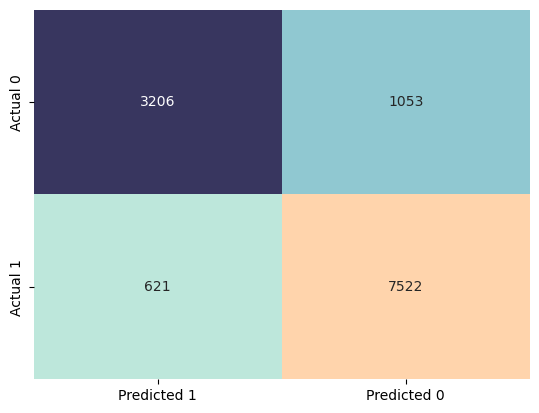

In [717]:
con_mat(model_xgb,'icefire')

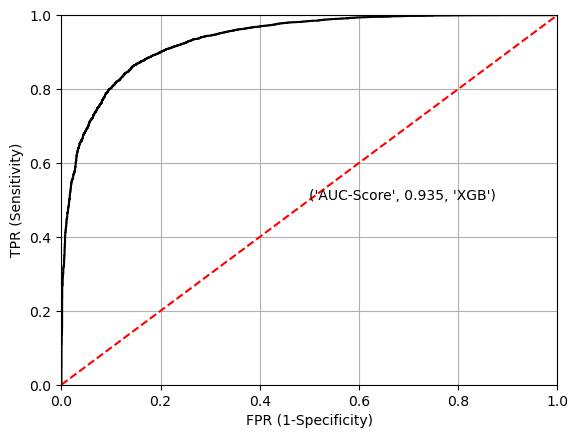

In [718]:
roc_cur(model_xgb,'k',0.5,0.5,'XGB')

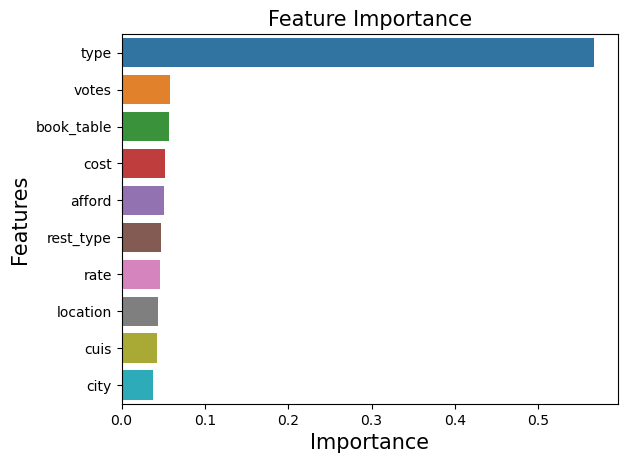

In [719]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model_xgb.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

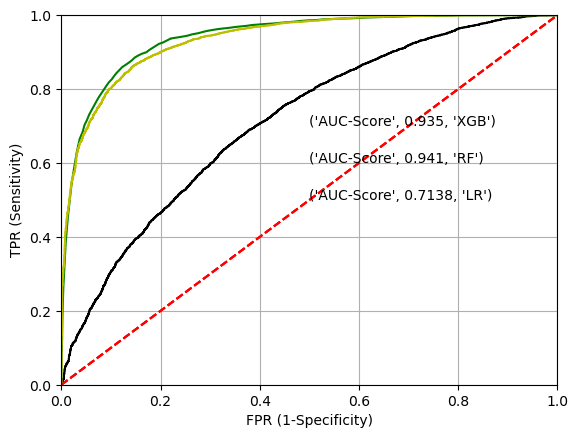

In [723]:
roc_cur(model_lr,'k',0.5,0.5,'LR')
roc_cur(model_rf,'g',0.5,0.6,'RF')
roc_cur(model_xgb,'y',0.5,0.7,'XGB')

WE can see that the RandomForest model is Performing better as compared to XGBoost and the Logistic Regression.
SO we are gonna go ahead with Random forest as our Final model and perform some hyperparameter tuning on it.

### Step 9: Choose the final model and tune the model.


In [726]:
tuned_params=[{'criterion':['entropy','gini'],'n_estimators' : [90, 100],'max_depth':range(2,5)}]
rf=RandomForestClassifier(random_state=0)
dc_grid=GridSearchCV(estimator=rf,param_grid=tuned_params,cv=5)

dc_grid_model=dc_grid.fit(xtrain,ytrain)
print('Best Params :',dc_grid_model.best_params_)

Best Params : {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 100}


In [727]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=4,random_state=0)
model_rfhyper=rf.fit(xtrain,ytrain)

In [728]:
get_report(model_rfhyper)

Test Report               precision    recall  f1-score   support

           0       0.72      0.42      0.53      4259
           1       0.75      0.91      0.82      8143

    accuracy                           0.74     12402
   macro avg       0.73      0.66      0.67     12402
weighted avg       0.74      0.74      0.72     12402

Train Report               precision    recall  f1-score   support

           0       0.73      0.41      0.52      9936
           1       0.75      0.92      0.82     18999

    accuracy                           0.74     28935
   macro avg       0.74      0.66      0.67     28935
weighted avg       0.74      0.74      0.72     28935



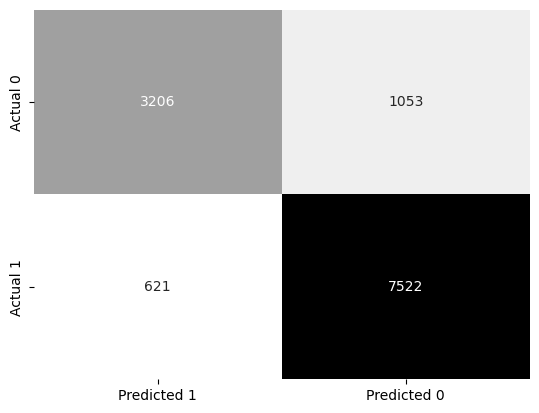

In [729]:
con_mat(model_xgb,'binary')

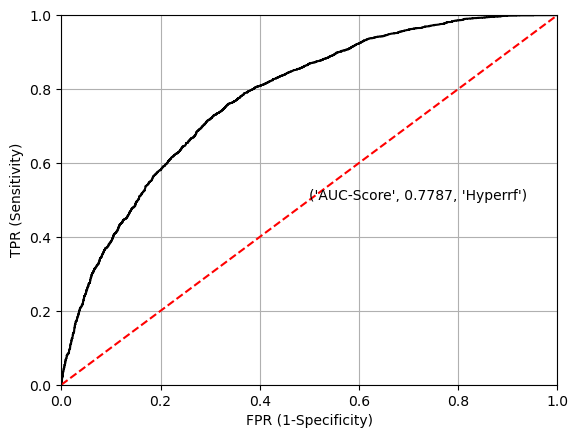

In [731]:
roc_cur(model_rfhyper,'k',0.5,0.5,'Hyperrf')

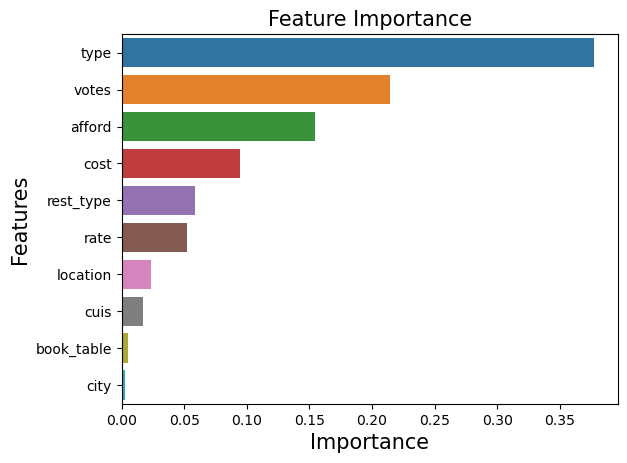

In [736]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model_rfhyper.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [750]:
# The model performance has dropped off after hyper tuning so we are gonna go ahead with Randomforest model with default parameters.
# As it is giving best results.

### Step 10: Write your business interpretation. And explain the reasons behind choosing the final model and how the chosen model performs well compared to other models.

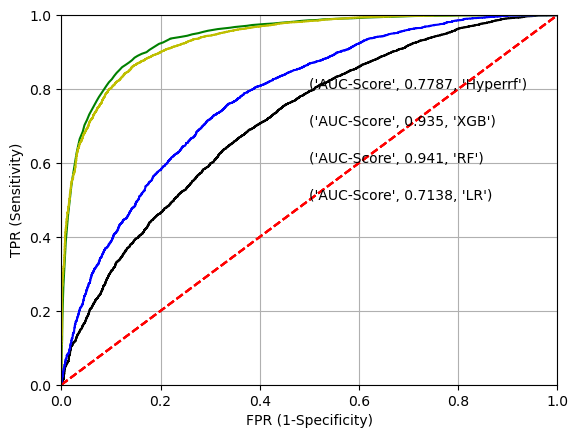

In [751]:
roc_cur(model_lr,'k',0.5,0.5,'LR')
roc_cur(model_rf,'g',0.5,0.6,'RF')
roc_cur(model_xgb,'y',0.5,0.7,'XGB')
roc_cur(model_rfhyper,'b',0.5,0.8,'Hyperrf')

In [753]:
# The model performance is best for random forest with default parmaters so we are gonna go ahead 
# with Randomforest model as it is giving best results.

##  Business interpretation

WE  can see that the type of restaurant and number of votes recieved previously has alot of affect on the customer ordering online or not so zomato needs to optimise that.